In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams["axes.grid"] = False
import mne
import ast

In [2]:
sesion = pd.read_csv("datos.csv")[['timestamp', 'sample_number', 'channel_data']]
sesion.channel_data = sesion.channel_data.apply(ast.literal_eval)
# print(sesion.dtypes)
sesion.head()

,timestamp,sample_number,channel_data
0,9522373,1,"[7277484, -1724, 2854980, 2977, 30746, 501840,..."
1,9524378,2,"[7277869, -1744, 2854023, 2997, 30702, 501517,..."
2,9526382,3,"[7277404, -1747, 2853958, 3031, 30713, 501008,..."
3,9528386,4,"[7277226, -1741, 2854062, 2996, 30781, 501654,..."
4,9530393,5,"[7277001, -1740, 2854134, 3011, 30795, 501968,..."


In [3]:
channel_data_df = sesion.channel_data.apply(pd.Series) * 2.4 / (2**23 - 1) # Convert to a millivolts
channel_data_df.columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
sesion = pd.concat([sesion.drop('channel_data', axis=1), channel_data_df], axis=1)
sesion.timestamp = sesion.timestamp.apply(lambda x: (x - sesion.timestamp.iloc[0]) / 10 ** 6)
sesion.head()

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,0.000000,1,2.082105,-0.000493,0.816816,0.000852,0.008797,0.143578,0.014937,0.0
1,0.002005,2,2.082215,-0.000499,0.816543,0.000857,0.008784,0.143485,0.014925,0.0
2,0.004009,3,2.082082,-0.000500,0.816524,0.000867,0.008787,0.143340,0.014938,0.0
3,0.006013,4,2.082031,-0.000498,0.816554,0.000857,0.008807,0.143524,0.014961,0.0
4,0.008020,5,2.081967,-0.000498,0.816574,0.000861,0.008811,0.143614,0.014974,0.0


In [4]:
sesion.head(20)

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,0.000000,1,2.082105,-0.000493,0.816816,0.000852,0.008797,0.143578,0.014937,0.0
1,0.002005,2,2.082215,-0.000499,0.816543,0.000857,0.008784,0.143485,0.014925,0.0
2,0.004009,3,2.082082,-0.000500,0.816524,0.000867,0.008787,0.143340,0.014938,0.0
3,0.006013,4,2.082031,-0.000498,0.816554,0.000857,0.008807,0.143524,0.014961,0.0
4,0.008020,5,2.081967,-0.000498,0.816574,0.000861,0.008811,0.143614,0.014974,0.0
5,0.010027,6,2.081999,-0.000500,0.816574,0.000857,0.008832,0.143475,0.014980,0.0
6,0.012030,7,2.082125,-0.000502,0.816557,0.000858,0.008825,0.143393,0.014964,0.0
7,0.014034,8,2.082215,-0.000507,0.816550,0.000860,0.008807,0.143318,0.014944,0.0
8,0.016037,9,2.082208,-0.000506,0.816589,0.000867,0.008797,0.143540,0.014952,0.0
9,0.018042,10,2.082091,-0.000500,0.816582,0.000863,0.008803,0.143626,0.014953,0.0


In [5]:
sesion.tail(20)

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
4980,9.983350,4981,2.081756,-0.000500,0.816311,-0.001134,-0.007122,0.143501,-0.008953,0.0
4981,9.985369,4982,2.081879,-0.000498,0.816317,-0.001135,-0.007123,0.143476,-0.008967,0.0
4982,9.987373,4983,2.081969,-0.000501,0.816300,-0.001134,-0.007134,0.143480,-0.008975,0.0
4983,9.989376,4984,2.081981,-0.000496,0.816320,-0.001134,-0.007128,0.143617,-0.008968,0.0
4984,9.991383,4985,2.081863,-0.000495,0.816344,-0.001142,-0.007143,0.143641,-0.008977,0.0
4985,9.993376,4986,2.081928,-0.000500,0.816338,-0.001145,-0.007155,0.143592,-0.008989,0.0
4986,9.995383,4987,2.081934,-0.000498,0.816267,-0.001133,-0.007139,0.143501,-0.008981,0.0
4987,9.997391,4988,2.081774,-0.000495,0.816224,-0.001130,-0.007128,0.143447,-0.008973,0.0
4988,9.999398,4989,2.081713,-0.000493,0.816262,-0.001134,-0.007128,0.143597,-0.008967,0.0
4989,10.001404,4990,2.081680,-0.000494,0.816277,-0.001130,-0.007124,0.143602,-0.008954,0.0


In [6]:
sesion.shape

(5000, 10)

In [7]:
x1 = sesion.channel_4
x2 = sesion.channel_7
t = sesion.timestamp

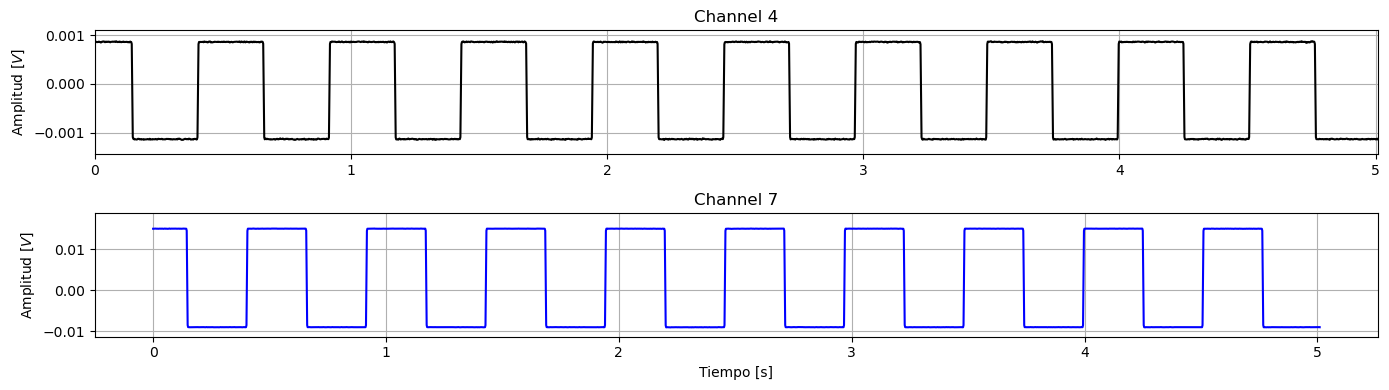

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x1[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$V$]') # 'Amplitud [$\mu V$]'
axs[0].set_xlim([t.min(), t[:2500].max()])
axs[0].set_ylim([x1.min() - abs(x1.min() * 0.25), x1.max() +  abs(x1.max() * 0.25)])
axs[0].set_title('Channel 4')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[:2500], x2[:2500], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$V$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x2.min() - abs(x2.min() * 0.25), x2.max() +  abs(x2.max() * 0.25)])
axs[1].set_title('Channel 7')
axs[1].grid()

# plt.show()

In [9]:
fs = 500.
info = mne.create_info(['channel_1','channel_2','channel_3','channel_4',
                        'channel_5','channel_6','channel_7','channel_8'], 
                       sfreq=fs, ch_types='eeg')
#info.set_montage('standard_1020')
info['description'] = 'Pruebas de EEG'
info['device_info'] = {'type':'Frontend', 'model':'AD8232'}
info['experimenter'] = 'Eloy'
info['line_freq'] = 50.0
info['subject_info'] = {'id':1,'last_name':'Yapur','first_name':'Jhoseline',
                        'birthday':(2002, 5, 12),'sex':2,'hand':1}
data = sesion.loc[:, 'channel_1':'channel_8'].values.T
eeg_raw = mne.io.RawArray(data, info, verbose=True)

Creating RawArray with float64 data, n_channels=8, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     9.998 secs
Ready.


In [10]:
eeg_raw.describe()

<RawArray | 8 x 5000 (10.0 s), ~327 kB, data loaded>
ch  name       type  unit        min         Q1     median         Q3        max
 0  channel_1  EEG   µV    2081587.28  2081874.81  2081970.37  2082065.14  2082381.78
 1  channel_2  EEG   µV      -514.13    -498.39    -495.53    -492.67    -476.65
 2  channel_3  EEG   µV    816201.59  816339.49  816374.11  816416.46  816816.43
 3  channel_4  EEG   µV     -1148.99   -1132.11    -131.03     860.88     878.62
 4  channel_5  EEG   µV     -7204.34   -7137.68     844.72    8804.80    8847.14
 5  channel_6  EEG   µV    143184.77  143464.87  143536.39  143604.20  143660.56
 6  channel_7  EEG   µV     -9025.96   -8968.45    3029.39   14954.00   14997.48
 7  channel_8  EEG   µV         0.00       0.00       0.00       0.00       0.00
